In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
data = pd.read_csv("/Users/claireleblanc/Downloads/degron_data.csv")

In [32]:
positives = ["R", "K"]
negatives = ["D", "E"]

hydrophobics = ["M", "I", "L", "V", "A", "F", "Y", "W"]

In [33]:
data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in data["aa"]]
data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in data["aa"]]


data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in data["aa"]]
data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in data["aa"]]

data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in data["aa"]]
data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in data["aa"]]

data["contains_three_hydrophobic"] = [contains_three_hydrophobics(s) for s in data["aa"]]
data["contains_two_hydrophobic"] = [contains_two_hydrophobics(s) for s in data["aa"]]
data["contains_hydrophobic"] = [contains_one_hydrophobics(s) for s in data["aa"]]

In [34]:
def contains_three_hydrophobics(seq):
    for i in range(len(seq)-5):
        if seq[i] in hydrophobics:
            if seq[i+1] in hydrophobics:
                if seq[i+2] in hydrophobics:
                    return True
    return False

def contains_two_hydrophobics(seq):
    for i in range(len(seq)-3):
        if seq[i] in hydrophobics:
            if seq[i+1] in hydrophobics:
                return True
    return False


def contains_one_hydrophobics(seq):
    for i in range(len(seq)-1):
        if seq[i] in hydrophobics:
            return True
    return False

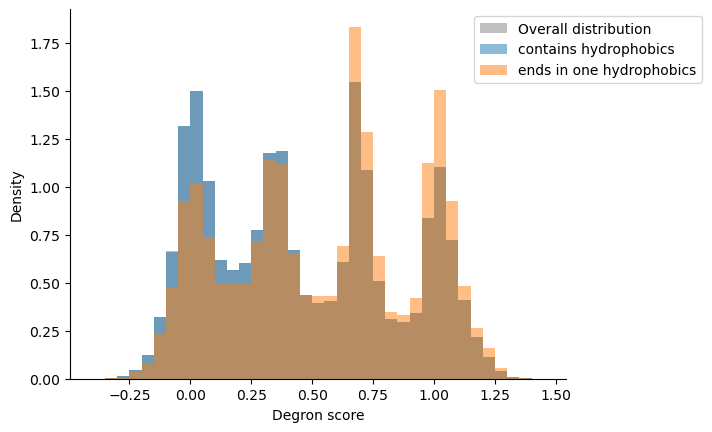

In [50]:
plt.hist(data["degron_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(-0.4, 1.5, 0.05), color='grey')

plt.hist(data[data["contains_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends in one hydrophobics",  bins=np.arange(-0.4, 1.5, 0.05))
plt.xlabel("Degron score")
plt.ylabel("Density")

plt.legend(bbox_to_anchor=(0.8,1))
sns.despine()

plt.savefig("../figures/degron_screen_one_hydro.pdf", format='pdf', bbox_inches='tight')

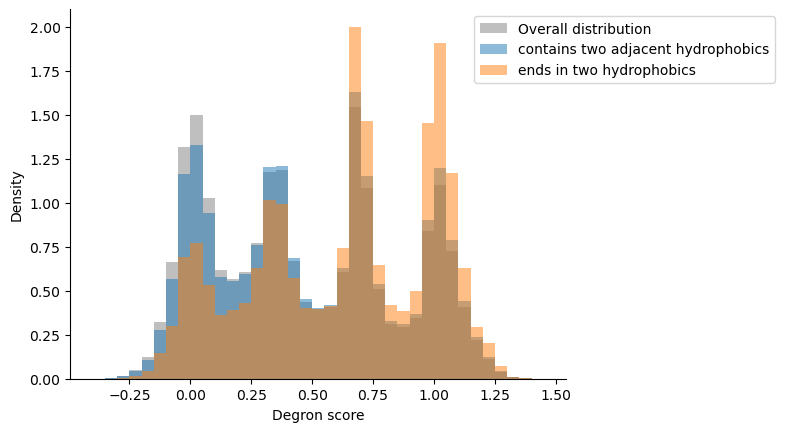

In [ ]:
plt.hist(data["degron_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(-0.4, 1.5, 0.05), color='grey')

plt.hist(data[data["contains_two_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains two adjacent hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_two_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends in two hydrophobics",  bins=np.arange(-0.4, 1.5, 0.05))
plt.xlabel("Degron score")
plt.ylabel("Density")

plt.legend(bbox_to_anchor=(0.8,1))
sns.despine()

plt.savefig("../figures/degron_screen_two_hydro.pdf", format='pdf', bbox_inches='tight')

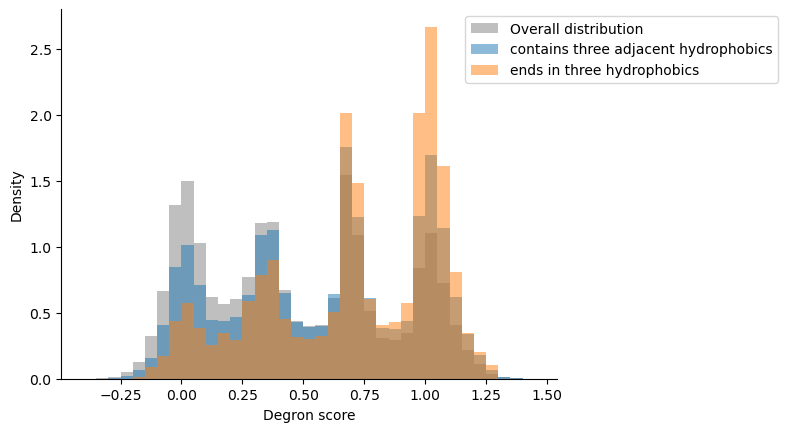

In [51]:
plt.hist(data["degron_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(-0.4, 1.5, 0.05), color='grey')

plt.hist(data[data["contains_three_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_three_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends in three hydrophobics",  bins=np.arange(-0.4, 1.5, 0.05))
plt.xlabel("Degron score")
plt.ylabel("Density")

plt.legend(bbox_to_anchor=(0.8,1))
sns.despine()

plt.savefig("../figures/degron_screen_three_hydro.pdf", format='pdf', bbox_inches='tight')

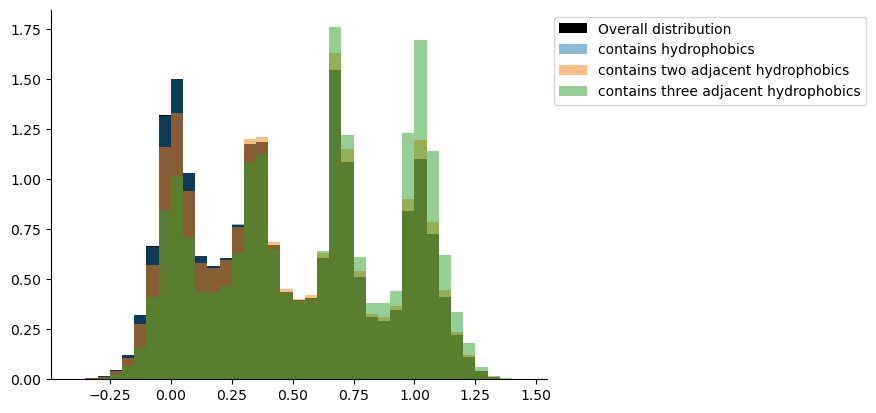

In [37]:
plt.hist(data["degron_score"], density=True, label="Overall distribution",  bins=np.arange(-0.4, 1.5, 0.05), color='black')
plt.hist(data[data["contains_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["contains_two_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains two adjacent hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["contains_three_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.legend(bbox_to_anchor=(1,1))
sns.despine()
plt.show()



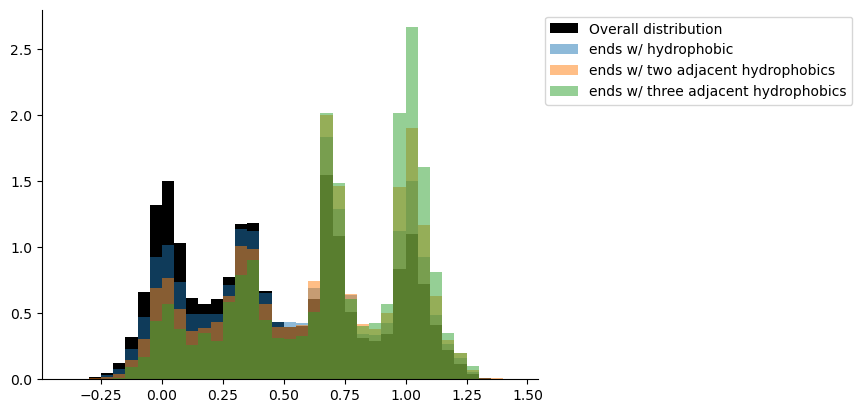

In [38]:
plt.hist(data["degron_score"], density=True, label="Overall distribution",  bins=np.arange(-0.4, 1.5, 0.05), color='black')
plt.hist(data[data["ends_w_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends w/ hydrophobic", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_two_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends w/ two adjacent hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_three_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends w/ three adjacent hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))

plt.legend(bbox_to_anchor=(1,1))
sns.despine()
plt.show()

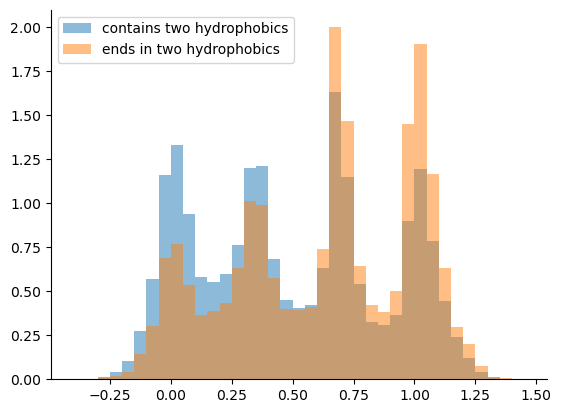

In [ ]:

plt.hist(data[data["contains_two_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains two hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_two_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends in two hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))

plt.legend()
sns.despine()

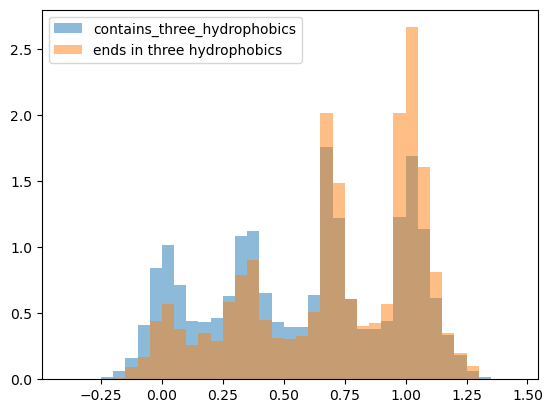

In [8]:
plt.hist(data[data["contains_three_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="contains_three_hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))
plt.hist(data[data["ends_w_three_hydrophobic"]]["degron_score"], density=True, alpha=0.5, label="ends in three hydrophobics", bins=np.arange(-0.4, 1.5, 0.05))

plt.legend()

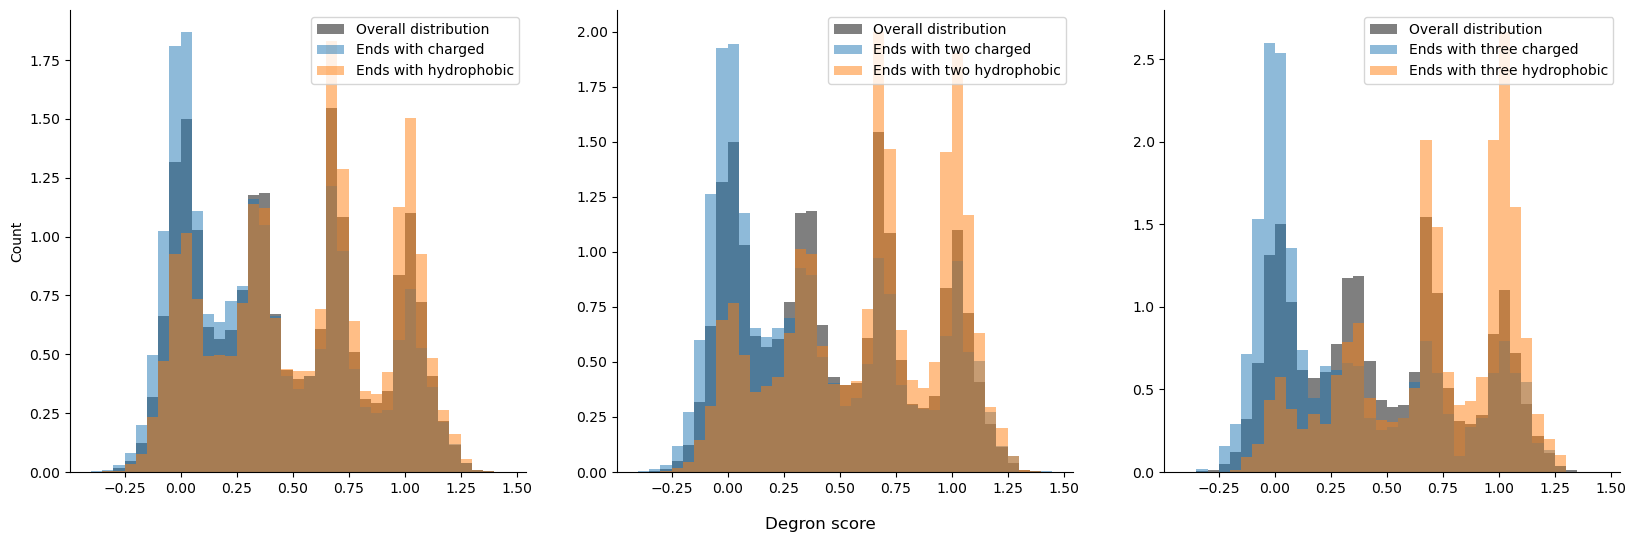

In [29]:
fig, axs = plt.subplots(1,3, figsize=(20,6))

axs[0].hist(data["degron_score"], alpha=0.5, label="Overall distribution", bins=np.arange(-0.4, 1.5, 0.05), color='black', density=True)
axs[0].hist(data[data["ends_w_charge"]]["degron_score"], alpha=0.5, label="Ends with charged", bins=np.arange(-0.4, 1.5, 0.05), density=True)
axs[0].hist(data[data["ends_w_hydrophobic"]]["degron_score"], alpha=0.5, label="Ends with hydrophobic", bins=np.arange(-0.4, 1.5, 0.05), density=True)

axs[1].hist(data["degron_score"], alpha=0.5, label="Overall distribution", bins=np.arange(-0.4, 1.5, 0.05), color='black', density=True)
axs[1].hist(data[data["ends_w_two_charge"]]["degron_score"], alpha=0.5, label="Ends with two charged", bins=np.arange(-0.4, 1.5, 0.05), density=True)
axs[1].hist(data[data["ends_w_two_hydrophobic"]]["degron_score"], alpha=0.5, label="Ends with two hydrophobic", bins=np.arange(-0.4, 1.5, 0.05), density=True)

axs[2].hist(data["degron_score"], alpha=0.5, label="Overall distribution", bins=np.arange(-0.4, 1.5, 0.05), color='black', density=True)
axs[2].hist(data[data["ends_w_three_charge"]]["degron_score"], alpha=0.5, label="Ends with three charged", bins=np.arange(-0.4, 1.5, 0.05), density=True)
axs[2].hist(data[data["ends_w_three_hydrophobic"]]["degron_score"], alpha=0.5, label="Ends with three hydrophobic", bins=np.arange(-0.4, 1.5, 0.05), density=True)

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.supxlabel("Degron score")
axs[0].set_ylabel("Count")

# fig.tight_layout()
sns.despine()


In [23]:
data.columns

Index(['name', 'gene', 'first_resi', 'last_resi', 'copyof_dna', 'copyof_aa',
       'lib', 'aa', 'dna', 'zf', 'n', 'degron_score', 'degron_std',
       'abundance_score', 'abundance_std', 'pap_ct', 'pap', 'locnes',
       'locnes_score', 'tile_rasa_median', 'tile_plddt_median',
       'ends_w_charge', 'ends_w_hydrophobic', 'ends_w_two_charge',
       'ends_w_two_hydrophobic', 'ends_w_three_charge',
       'ends_w_three_hydrophobic'],
      dtype='object')

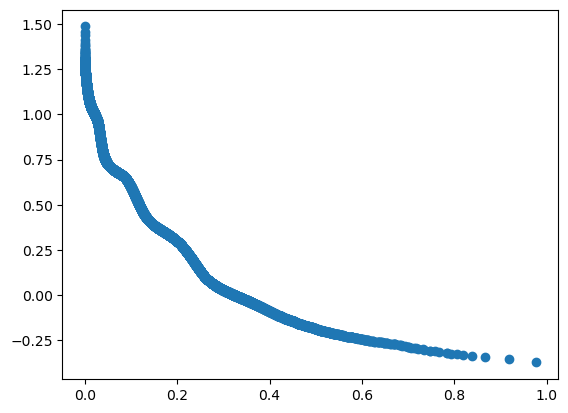

In [22]:
plt.scatter(data["abundance_score"], data["degron_score"])